In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/car_prices/car_prices.csv', low_memory=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  object 
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 68.2+ MB


## Question 1. Determine the number of missing values in each column.

In [2]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [3]:
df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 4
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

#### We can see that transmission has the highest number of null values. Values like state and year are never missing.

## Question 2. Check the data types.

In [4]:
#condition should be a float type, not an object
df['condition'] = pd.to_numeric(df['condition'], errors='coerce')

In [5]:
#mmr should be an integer type, not object
df['mmr'] = pd.to_numeric(df['mmr'], errors='coerce', downcast='integer')

In [6]:
#similarly, saledate should be changed to a datetime type
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce', utc = True)

In [7]:
df.sample(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
217724,2007,NaN,NaN,NaN,NaN,automatic,3gnda13dx7s634994,co,2.0,51193.0,burgundy,gray,gmac smartlane dealers,4400.0,6000,2015-02-10 19:45:00+00:00
316524,2006,Ford,F-150,FX4,SuperCab,NaN,1ftpx14586na03441,nc,1.9,113588.0,black,black,meridian remarketing,9425.0,9800,2015-02-22 17:30:00+00:00
542134,2003,Honda,Accord,LX,sedan,NaN,1hgcm56483a811859,on,1.9,184564.0,gray,black,mercedes-benz,2475.0,2900,2015-06-18 04:30:00+00:00


In [8]:
df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                26
sellingprice        0
saledate           26
dtype: int64

#### It is important to note that while we converted all the possible rows to their correct data type, a few rows had values which could not be converted, and were hence erraneous data. These have been entered as null. Thus the number of null values increased by a bit


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   year          558837 non-null  int64              
 1   make          548536 non-null  object             
 2   model         548438 non-null  object             
 3   trim          548186 non-null  object             
 4   body          545642 non-null  object             
 5   transmission  493484 non-null  object             
 6   vin           558833 non-null  object             
 7   state         558837 non-null  object             
 8   condition     547017 non-null  float64            
 9   odometer      558743 non-null  float64            
 10  color         558088 non-null  object             
 11  interior      558088 non-null  object             
 12  seller        558837 non-null  object             
 13  mmr           558811 non-null  float64      

#### The data types of those 3 columns has been changed, as we can see

## Question 3. Analyze the make column.

In [10]:
makes = df.make.unique().tolist()
# makes = [str(x).lower() for x in makes
len(makes)

97

In [11]:
df[df['make'].isna()]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
742,2012,NaN,NaN,NaN,NaN,automatic,wbakb8c51cc964387,ca,3.8,23208.0,gray,black,financial services remarketing (lease),47200.0,46000,2015-02-25 20:30:00+00:00
747,2012,NaN,NaN,NaN,NaN,automatic,wbakb8c53cc964410,ca,3.3,19785.0,beige,gray,financial services remarketing (lease),49500.0,46000,2015-02-11 20:30:00+00:00
766,2012,NaN,NaN,NaN,NaN,automatic,wbakb8c54cc964089,ca,3.7,48424.0,black,black,financial services remarketing (lease),42300.0,43000,2015-01-14 20:30:00+00:00
798,2012,NaN,NaN,NaN,NaN,automatic,wbakb8c59cc448049,ca,4.8,39825.0,—,gray,financial services remarketing (lease),58100.0,58500,2015-01-14 20:30:00+00:00
803,2012,NaN,NaN,NaN,NaN,automatic,wbakb8c58cc962863,ca,4.9,35093.0,blue,tan,financial services remarketing (lease),45200.0,44500,2015-01-28 20:30:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558545,2000,NaN,NaN,NaN,NaN,automatic,4n2xn11txyd844711,ma,3.1,108900.0,green,gray,boch toyota/scion south,1275.0,1100,2015-06-18 04:30:00+00:00
558617,2007,NaN,NaN,NaN,NaN,automatic,jtjbt20x770129305,pa,4.1,66393.0,—,beige,r hollenshead auto sales inc,18150.0,18500,2015-06-18 19:00:00+00:00
558736,2011,NaN,NaN,NaN,NaN,automatic,4a4jn2as6be029938,nv,4.1,67820.0,silver,black,imperial rides,9175.0,10500,2015-06-18 22:00:00+00:00
558773,2005,NaN,NaN,NaN,NaN,automatic,1g1yy24u355116011,tx,2.4,114787.0,burgundy,black,hopper motorplex inc,15400.0,14800,2015-06-23 20:15:00+00:00


#### The above shows all those where make is null. All those rows have no important info and thus we can drop them

In [12]:
df = df.dropna(subset=['make']) #drop all rows without a make

In [13]:
df.isna().sum()

year                0
make                0
model              98
trim              350
body             2894
transmission    63592
vin                 4
state               0
condition       11733
odometer           90
color             734
interior          734
seller              0
mmr                26
sellingprice        0
saledate           26
dtype: int64

In [14]:
df.sample()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
357766,2013,Ford,Mustang,GT Premium,Coupe,manual,1zvbp8cf0d5252887,ca,4.4,724.0,black,black,"ford motor credit company,llc",26700.0,43700,2015-03-04 20:30:00+00:00


In [15]:
#first, we can remove all the duplicates that are arising because of different capitalising. Start by converting to lower
df['make'] = df['make'].str.lower()

In [16]:
import re

In [17]:
makes = df.make.unique().tolist()
# makes = [str(x).lower() for x in makes]
len(makes)

66

In [18]:
sorted(makes)

['acura',
 'airstream',
 'aston martin',
 'audi',
 'bentley',
 'bmw',
 'buick',
 'cadillac',
 'chev truck',
 'chevrolet',
 'chrysler',
 'daewoo',
 'dodge',
 'dodge tk',
 'dot',
 'ferrari',
 'fiat',
 'fisker',
 'ford',
 'ford tk',
 'ford truck',
 'geo',
 'gmc',
 'gmc truck',
 'honda',
 'hummer',
 'hyundai',
 'hyundai tk',
 'infiniti',
 'isuzu',
 'jaguar',
 'jeep',
 'kia',
 'lamborghini',
 'land rover',
 'landrover',
 'lexus',
 'lincoln',
 'lotus',
 'maserati',
 'mazda',
 'mazda tk',
 'mercedes',
 'mercedes-b',
 'mercedes-benz',
 'mercury',
 'mini',
 'mitsubishi',
 'nissan',
 'oldsmobile',
 'plymouth',
 'pontiac',
 'porsche',
 'ram',
 'rolls-royce',
 'saab',
 'saturn',
 'scion',
 'smart',
 'subaru',
 'suzuki',
 'tesla',
 'toyota',
 'volkswagen',
 'volvo',
 'vw']

#### Replacing ' tk' and 'truck' with an empty string, vw with volswagen, joining all instances of mercedes, and land rover with landrover, chev with chevrolet

In [19]:
df['make'] = df['make'].str.replace(r'( tk|truck)', '')
df['make'] = df['make'].apply(lambda x: re.sub(r'vw', 'volkswagen', x))
df['make'] = df['make'].apply(lambda x: re.sub(r'chev ', 'chevrolet', x)) #with the space, so that the 
                                                                        #chev in chevrolet doesnt replace
df['make'] = df['make'].apply(lambda x: re.sub(r'-b.*', '', x))   #all mercedes instances
df['make'] = df['make'].apply(lambda x: re.sub(r' ', '', x))     #replace spaces with blanks

C:\Users\Tarun\AppData\Local\Temp\ipykernel_25284\3977000570.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['make'] = df['make'].str.replace(r'( tk|truck)', '')


In [20]:
makes = df.make.unique().tolist()
sorted(makes)

['acura',
 'airstream',
 'astonmartin',
 'audi',
 'bentley',
 'bmw',
 'buick',
 'cadillac',
 'chevrolet',
 'chrysler',
 'daewoo',
 'dodge',
 'dot',
 'ferrari',
 'fiat',
 'fisker',
 'ford',
 'geo',
 'gmc',
 'honda',
 'hummer',
 'hyundai',
 'infiniti',
 'isuzu',
 'jaguar',
 'jeep',
 'kia',
 'lamborghini',
 'landrover',
 'lexus',
 'lincoln',
 'lotus',
 'maserati',
 'mazda',
 'mercedes',
 'mercury',
 'mini',
 'mitsubishi',
 'nissan',
 'oldsmobile',
 'plymouth',
 'pontiac',
 'porsche',
 'ram',
 'rolls-royce',
 'saab',
 'saturn',
 'scion',
 'smart',
 'subaru',
 'suzuki',
 'tesla',
 'toyota',
 'volkswagen',
 'volvo']

In [21]:
len(makes)

55

#### Without using too many individual replaces, this is the lowest we can come to

#### First, we make all the letters small. This solves issues of differences like 'Pontiac' vs 'pontiac'. Next, we unify all the makes which have tk and truck after that. Then we change vw to volswagen, as this is a one off case and has no pattern. Once truck is removed from chev, we merge this with chevrolet. It is important to keep the space in 'chev ' or else it will replace the 'chev' in chervrolet also. Once this is done, we can cut all spaces. This also resolves the differences between land rover and landrover. Then , there is specific regex for mercedes to remove '-b' and '-benz'.

## Question 4. Analyze the relationship between the wholeprice mmr and the salesprice.

### What is the overall correlation?

In [22]:
print(df['mmr'].corr(df['sellingprice']))

0.9835981325410766


In [23]:
df["sellingprice"].describe()

count    548536.000000
mean      13698.503570
std        9728.202129
min           1.000000
25%        7000.000000
50%       12200.000000
75%       18300.000000
max      230000.000000
Name: sellingprice, dtype: float64

In [24]:
df_filter = df[["mmr", "sellingprice"]]
i = 10000
corrs = []
limit = []
while i!= df["sellingprice"].max()+10000:
    df_bucket = df_filter[df_filter['sellingprice'] <i] #creating a new dataframe for each bucket
    print("For range 0 to", i, "Correlation is", df_bucket['mmr'].corr(df_bucket['sellingprice']))
    corrs.append(df_bucket['mmr'].corr(df_bucket['sellingprice']))
    limit.append(i)
    i = i+10000

For range 0 to 10000 Correlation is 0.8697804377225687
For range 0 to 20000 Correlation is 0.9575118970696909
For range 0 to 30000 Correlation is 0.9741855743673665
For range 0 to 40000 Correlation is 0.9790395072212825
For range 0 to 50000 Correlation is 0.9811651011054551
For range 0 to 60000 Correlation is 0.9821893723727105
For range 0 to 70000 Correlation is 0.9826408860838695
For range 0 to 80000 Correlation is 0.9831126014977609
For range 0 to 90000 Correlation is 0.9833676274051306
For range 0 to 100000 Correlation is 0.9835362118738643
For range 0 to 110000 Correlation is 0.983542142428449
For range 0 to 120000 Correlation is 0.9836269317882413
For range 0 to 130000 Correlation is 0.9837088059046218
For range 0 to 140000 Correlation is 0.9837772024012817
For range 0 to 150000 Correlation is 0.9838519332548993
For range 0 to 160000 Correlation is 0.9839234263172804
For range 0 to 170000 Correlation is 0.9839808119371984
For range 0 to 180000 Correlation is 0.9839960400866303
Fo

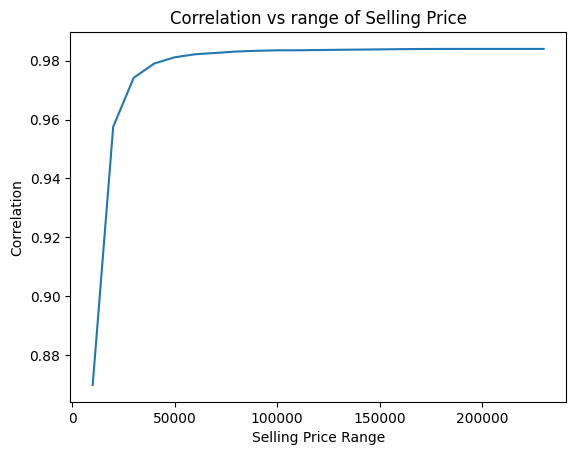

In [25]:
plt.plot(limit, corrs)
plt.xlabel("Selling Price Range")
plt.ylabel("Correlation")
# plt.ylim(0, 1)
plt.title("Correlation vs range of Selling Price")
plt.show()

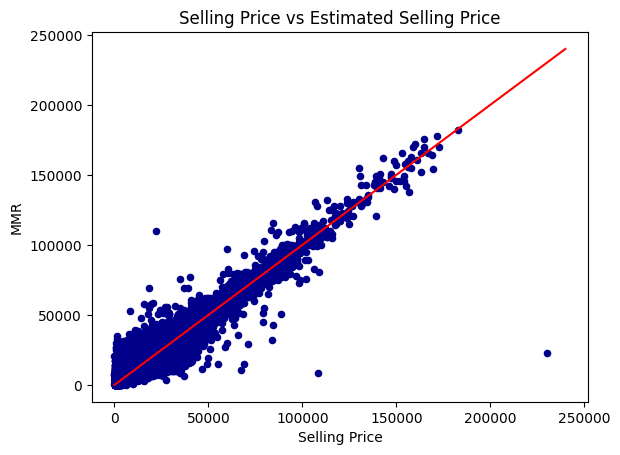

In [26]:
df.plot.scatter(x='sellingprice',y='mmr',c='DarkBlue')
plt.title("Selling Price vs MMR")
plt.xlabel("Selling Price")
plt.ylabel("MMR")
a = np.linspace(0,240000,100) 
plt.plot(a, a,c='Red') #straight line
plt.title("Selling Price vs Estimated Selling Price")
plt.show()

#### Above graph shows the relation between mmr, which is the estimated price, to the actual selling price. When we draw a straight line through it, we see that apart from a few outliers, the predictions are quite decent. 

#### Also, when we look at correlation graph, we see the correlation gets higher as we increaes the range. This tells us that as we get more data, the predictions get better

## Question 5. How does the distribution of salesprice vary by make for cars made between 2010-2015?

In [27]:
df_year = df[(df["year"] >=2010) & (df["year"] <= 2015)]

In [28]:
top_makes = df_year["make"].value_counts().head(10).index.to_list()
top_makes

['ford',
 'nissan',
 'chevrolet',
 'toyota',
 'dodge',
 'hyundai',
 'honda',
 'kia',
 'infiniti',
 'bmw']

In [29]:
df_final = df_year[df_year['make'].isin(top_makes)]

In [30]:
df_final

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500.0,21500,2014-12-16 04:30:00+00:00
1,2015,kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800.0,21500,2014-12-16 04:30:00+00:00
2,2014,bmw,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900.0,30000,2015-01-14 20:30:00+00:00
4,2014,bmw,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000.0,67000,2014-12-18 04:30:00+00:00
5,2015,nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900,2014-12-30 04:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,bmw,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,3.9,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800,2015-07-06 23:15:00+00:00
558832,2015,kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300.0,33000,2015-07-09 00:00:00+00:00
558834,2012,bmw,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800.0,34000,2015-07-08 02:30:00+00:00
558835,2015,nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100,2015-07-08 23:45:00+00:00


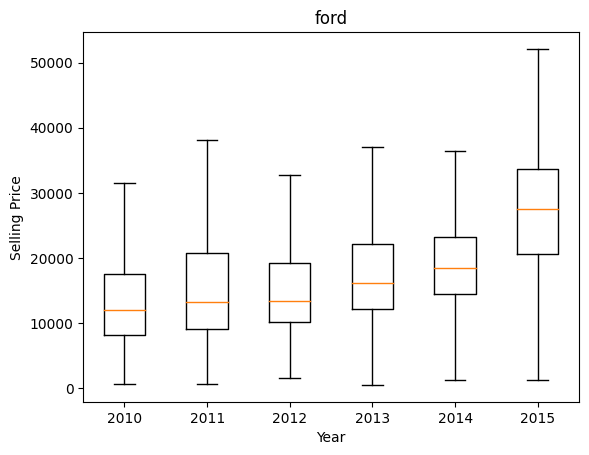

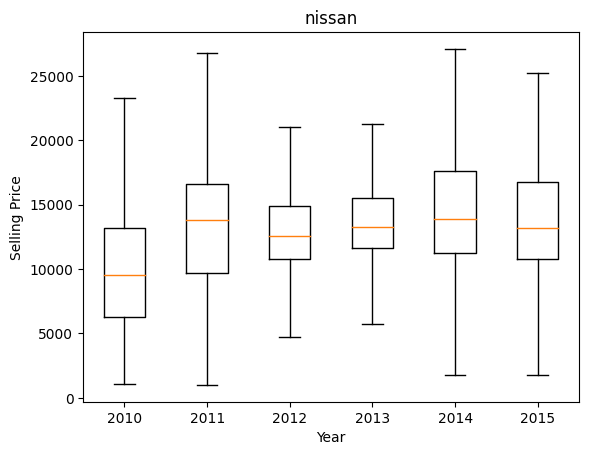

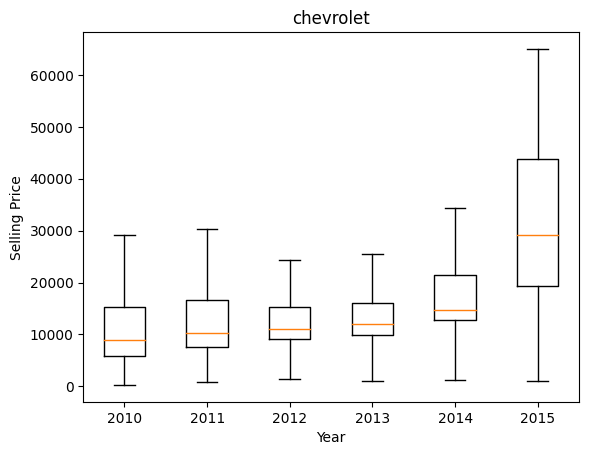

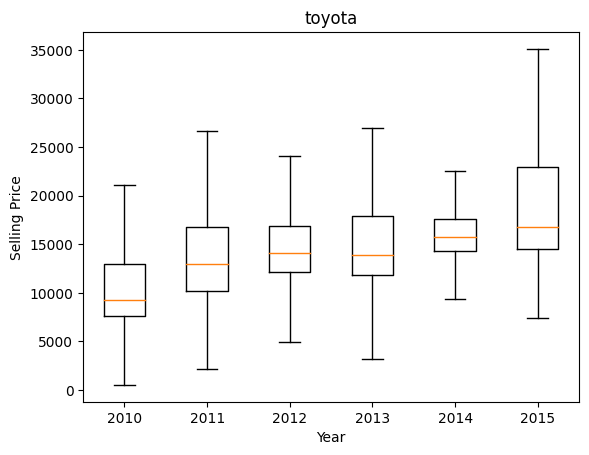

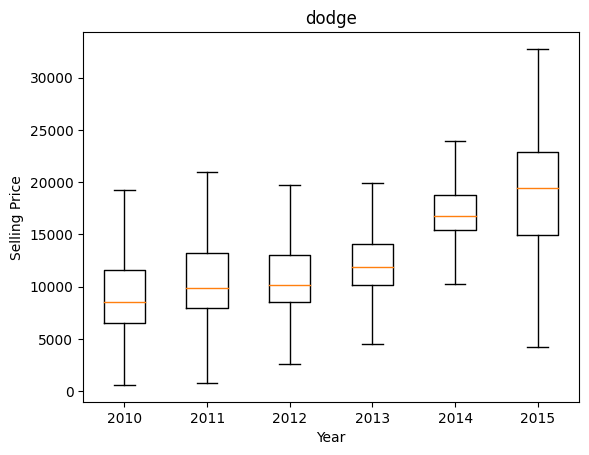

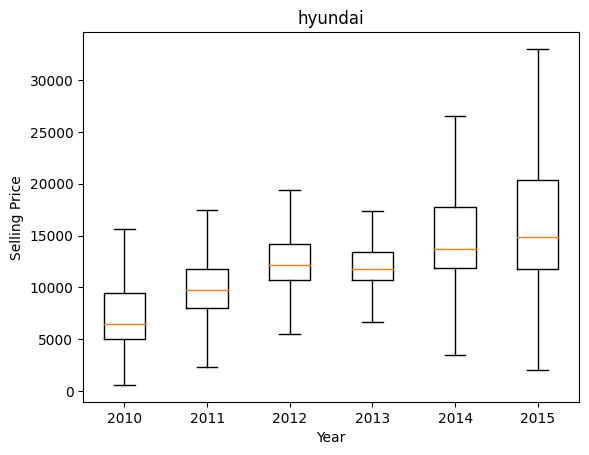

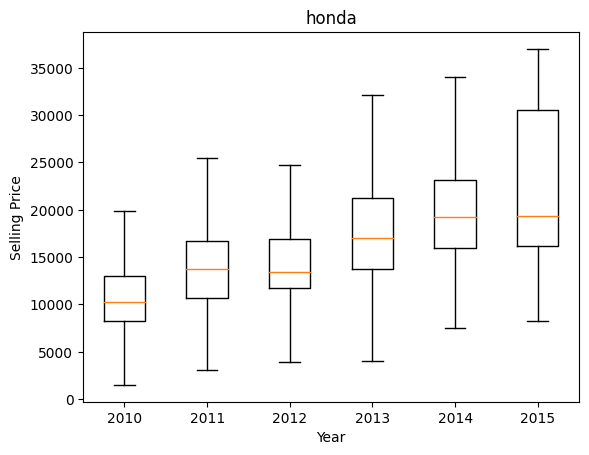

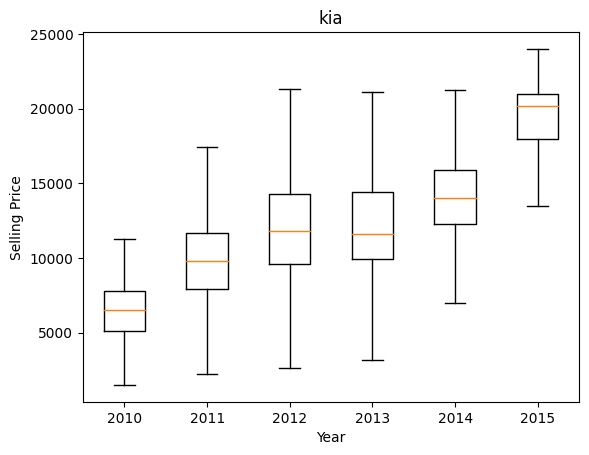

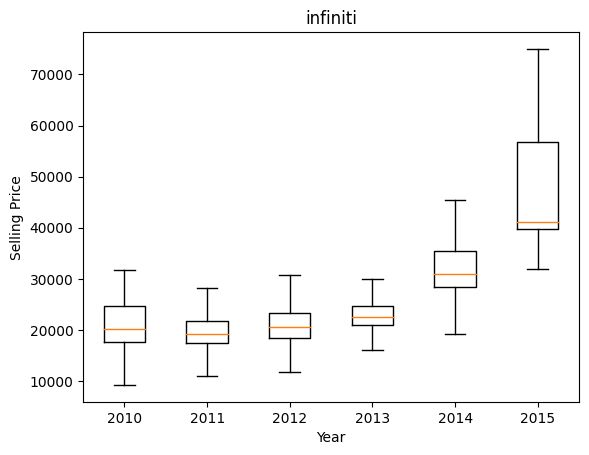

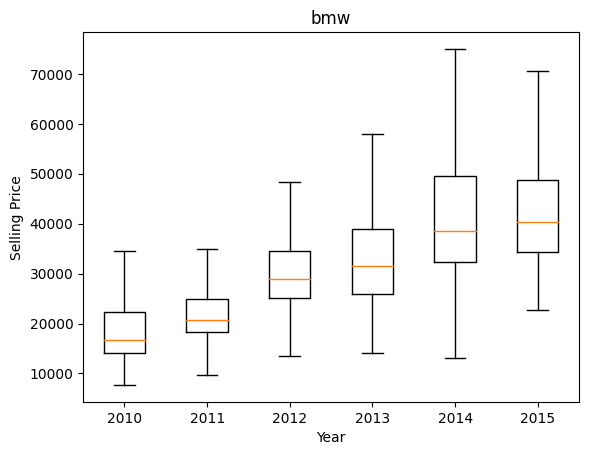

In [31]:
for make in top_makes:
    data = df_final[df_final['make'] == make].groupby('year')['sellingprice'].apply(list)
    fig, ax = plt.subplots()
    ax.boxplot(data, positions=data.index, widths=0.5, showfliers=False)
    ax.set_xticks(data.index)
    ax.set_xlabel('Year')
    ax.set_ylabel('Selling Price')
    ax.set_title(make)
    plt.show()

#### We can see from the trends, almost all the makes had an upwards trend in selling price. It is also worth noting that usually, there is sharper increase from 2014-2015 than between any other years (see infiniti, kia, chevrolet, ford). This might be because there was an increase in price of one of the raw materials required to make the car after 2014

#### Toyota and Nissan has had their prices remain more or less the same